# **Small Data Analysis**
* What's the total number of images in the dataset.
* How many blur and clear images in the dataset by percentage.
* Images size distribution.

In [61]:
import os
import cv2
from tqdm import tqdm

def is_blurry(image_path, threshold=100.0):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    return cv2.Laplacian(image, cv2.CV_64F).var() < threshold

def analyze_dataset(root_folder):
    total_images = 0
    blurry_images = 0
    clear_images = 0
    
    size_classes = {'<10KB':0, '10-20KB':0, '>=30KB':0}
    
    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in tqdm(filenames):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.webp')):
                total_images += 1
                filepath = os.path.join(foldername, filename)
                
                #blurry images detection
                blurry = is_blurry(filepath)
                if blurry is None:
                    continue
                if blurry:
                    blurry_images +=1
                else:
                    clear_images +=1
                    
                # size classification
                size_kb = os.path.getsize(filepath)/1024
                if size_kb <10:
                    size_classes['<10KB'] += 1
                elif 10 <= size_kb <20:
                    size_classes['10-20KB'] += 1
                elif size_kb >= 30:
                    size_classes['>=30KB'] += 1
                          

    print(f"Total images: {total_images}") 
    print(f"Blurry images: {blurry_images} ({(blurry_images/total_images)*100:.2f}%)")
    print(f"Clear images: {clear_images} ({(clear_images/total_images)*100:.2f}%)")
    print("Image size distribution:")
    for size_class, count in size_classes.items():
        print(f"{size_class}: {count} ({(count/total_images)*100:.2f}%)")
        
               
analyze_dataset("/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets")


100%|██████████| 2/2 [00:00<00:00, 28630.06it/s]
0it [00:00, ?it/s]
100%|██████████| 250/250 [00:00<00:00, 1352.76it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:00<00:00, 1282.23it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 1150.76it/s]
0it [00:00, ?it/s]
100%|██████████| 250/250 [00:00<00:00, 1416.87it/s]

Total images: 2074
Blurry images: 172 (8.29%)
Clear images: 1902 (91.71%)
Image size distribution:
<10KB: 58 (2.80%)
10-20KB: 1198 (57.76%)
>=30KB: 70 (3.38%)


Logging the emotion, 
In our case it's the folder name.

In [62]:
import os
import cv2
import csv
from tqdm import tqdm
from collections import defaultdict

emotion_stats = defaultdict(lambda: {'total': 0, 'blurry': 0, 'clear': 0})

def is_blurry(image_path, threshold=100.0):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    return cv2.Laplacian(image, cv2.CV_64F).var() < threshold

def get_size_class(size_kb):
    if size_kb < 10:
        return '<10KB'
    elif 10 <= size_kb < 20:
        return '10-20KB'
    elif 20 <= size_kb < 30:
        return '20-30KB'
    else:
        return '>=30KB'

# List to store data for CSV
image_data_list = []

root_folder = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets"

for foldername, subfolders, filenames in os.walk(root_folder):
    for filename in tqdm(filenames):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.webp')):
            label = os.path.basename(foldername)
            filepath = os.path.join(foldername, filename)

            size_kb = os.path.getsize(filepath) / 1024
            size_class = get_size_class(size_kb)
            blurry = is_blurry(filepath)

            if blurry is None:
                continue

            # Update emotion stats
            emotion_stats[label]['total'] += 1
            if blurry:
                emotion_stats[label]['blurry'] += 1
            else:
                emotion_stats[label]['clear'] += 1

            # Append row data for CSV
            image_data_list.append([
                os.path.relpath(filepath, root_folder),  # relative path
                label,
                round(size_kb, 2),
                size_class,
                blurry
            ])

# Print per-emotion stats
print("\nPer-emotion statistics:")
for emotion, stats in emotion_stats.items():
    total = stats['total']
    blurry = stats['blurry']
    clear = stats['clear']
    print(f"{emotion}: Total: {total}, Blurry: {blurry} ({(blurry/total)*100:.2f}%), Clear: {clear} ({(clear/total)*100:.2f}%)")

# Save to CSV
csv_path = "emotion_stats.csv"
with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Image", "Label", "Size (KB)", "Size_Class", "Blurry"])
    writer.writerows(image_data_list)

print(f"\nCSV saved as {csv_path}")


100%|██████████| 2/2 [00:00<00:00, 50231.19it/s]
0it [00:00, ?it/s]
100%|██████████| 250/250 [00:00<00:00, 2644.59it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 9/9 [00:00<00:00, 2097.97it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 1557.60it/s]
0it [00:00, ?it/s]
100%|██████████| 250/250 [00:00<00:00, 2459.25it/s]



Per-emotion statistics:
happy: Total: 522, Blurry: 37 (7.09%), Clear: 485 (92.91%)
Sad: Total: 521, Blurry: 51 (9.79%), Clear: 470 (90.21%)
Other: Total: 512, Blurry: 48 (9.38%), Clear: 464 (90.62%)
Angry: Total: 519, Blurry: 36 (6.94%), Clear: 483 (93.06%)

CSV saved as emotion_stats.csv


Creating a Machine Learning Model from Scratch
Convolutional Neural Network - Selected for this purpose|

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Using image data generator:
img_height, img_width = 150, 150
batch_size = 32
data_dir  = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1660 images belonging to 1 classes.
Found 414 images belonging to 1 classes.


In [64]:
# Building the CNN Model:

model_baseline = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
import tensorflow as tf
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# Compiling the model:
model_baseline.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_baseline.fit(
    train_generator, 
    epochs = 10,
    validation_data = val_generator,
    callbacks = [tensorboard_callback]
)

# Saving the model:

model_baseline.save("Pet's Facial Expression Recognition.h5")

/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 246ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 239ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 246ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s

### **EVALUATING THE CNN MODEL**

In [66]:
loss, accuracy = model_baseline.evaluate(val_generator)
print(f"\nValidation Loss: {loss:.4f}, \nValidation Accuracy: {accuracy:.4f}")
    


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 1.0000 - loss: 0.0000e+00

Validation Loss: 0.0000, 
Validation Accuracy: 1.0000


In [67]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# PRedicting on test data:
y_true = val_generator.classes
y_pred = model_baseline.predict(val_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Generating classification report:
report = classification_report(y_true, y_pred_labels, target_names=val_generator.class_indices.keys())
print("Classification Report:\n", report)



 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step 

/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
Classification Report:
                                  precision    recall  f1-score   support

Facial Expression Image Dataset       1.00      1.00      1.00       414

                       accuracy                           1.00       414
                      macro avg       1.00      1.00      1.00       414
                   weighted avg       1.00      1.00      1.00       414



In [68]:
# Testing the model with a new image:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Programs/test_image.jpg"
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale the image or normalizing it

# Predicting the class:
predictions = model_baseline.predict(img_array)
predicted_index = np.argmax(predictions[0])
print("Predicted class probabilities:", predicted_index)

# Mapping it to the class name:
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_index]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class probabilities: 0
Predicted class: Facial Expression Image Dataset


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


#### **Architecture - Flow Diagram**

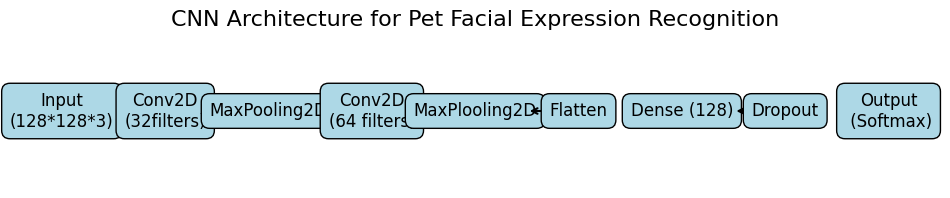

In [69]:
import matplotlib.pyplot as plt

layers = ['Input\n(128*128*3)', 'Conv2D\n(32filters)', 'MaxPooling2D',
          'Conv2D\n(64 filters)', 'MaxPlooling2D',
          'Flatten', 'Dense (128)', 'Dropout', 'Output\n (Softmax)']


fig, ax = plt.subplots(figsize=(12, 2))
for i, layer in enumerate(layers):
    ax.text(i, 0.5, layer, ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))
    if i< len(layers) - 1:
        ax.annotate('', xy=(i + 0.5, 0.5), xytext=(i + 1, 0.5),
                    arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
ax.set_xlim(-0.5, len(layers) - 0.5)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title('CNN Architecture for Pet Facial Expression Recognition', fontsize=16)
plt.show()

## **CREATING ANOTHER ML MODEL FOR PET'S FACE RECOGNITION**

MobileNetV2 is a lightweight, accurate and easy to use machine learning model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining paths and hyperparameters
data_dir = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets/Facial Expression Image Dataset"

img_height, img_width = 224, 224

batch_size = 32

# Data preparation with Validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = datagen.flow_from_directory(
    "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets/Facial Expression Image Dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
   "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Datasets/Facial Expression Image Dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# Loading the pretrained MobileNetV2 model:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

base_model.trainable = False  # Freeze the base model

# Building the model:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),  
    Dense(train_generator.num_classes, activation='softmax')
])

# Compiling the model:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size


# Training the model:
model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps
)


# Saving the model:
model.save("Pet_Facial_Expression_Recognition_MobileNetV2.h5")


Found 1660 images belonging to 5 classes.
Found 414 images belonging to 5 classes.


/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - accuracy: 0.3929 - loss: 1.6187 - val_accuracy: 0.4635 - val_loss: 1.4225
Epoch 2/20
 1/51 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.5312 - loss: 1.2286

/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/.venv/lib/python3.9/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5312 - loss: 1.2286 - val_accuracy: 0.4922 - val_loss: 1.3970
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.4614 - loss: 1.4431 - val_accuracy: 0.4271 - val_loss: 1.3887
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6250 - loss: 1.0113 - val_accuracy: 0.4297 - val_loss: 1.3625
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - accuracy: 0.4563 - loss: 1.4174 - val_accuracy: 0.4401 - val_loss: 1.3492
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4688 - loss: 1.4295 - val_accuracy: 0.4115 - val_loss: 1.3642
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - accuracy: 0.4923 - loss: 1.3476 - val_accuracy: 0.4479 - val_loss: 1.3651
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.3125 - loss: 1.3294 - val_accuracy: 0.4167 - val_loss: 1.4062
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accuracy: 0.4987 - loss: 1.3142 - val_accuracy: 0.4089 - val_

### Evaluating the MobileNetV2 Model 

In [ ]:
# Evaluating the model:
loss, accuracy = model.evaluate(val_generator)
print(f"\nValidation Loss: {loss:.4f}, \nValidation Accuracy: {accuracy:.4f}")
# Predicting on validation data:
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_labels = np.argmax(y_pred, axis=1)
# Generating classification report:         
report = classification_report(y_true, y_pred_labels, target_names=val_generator.class_indices.keys())
print("Classification Report:\n", report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.4088 - loss: 1.3023

Validation Loss: 1.2684, 
Validation Accuracy: 0.4300
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step
Classification Report:
                precision    recall  f1-score   support

        Angry       0.12      0.24      0.16        50
Master Folder       0.50      0.72      0.59       214
        Other       0.20      0.02      0.04        50
          Sad       0.50      0.02      0.04        50
        happy       0.00      0.00      0.00        50

     accuracy                           0.41       414
    macro avg       0.27      0.20      0.17       414
 weighted avg       0.36      0.41      0.34       414



## Trying out if it predicts

In [ ]:
# Testing the model with a new image:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/Users/ishaanrastogi/Desktop/Ishaan_Rastogi/Machine Learning Internship/Programs/test_image.jpg"
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale the image or normalizing it

# Predicting the class:
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions[0])
print("Predicted class probabilities:", predicted_index)

# Mapping it to the class name:
class_labels = list(train_generator.class_indices.keys())
predicted_class = class_labels[predicted_index]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
Predicted class probabilities: 1
Predicted class: Master Folder
